# Question 1

## Import Required Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Sales and Profitability Analysis

## Load Datasets

In [ ]:
list_of_orders = pd.read_csv('BA4A9908.csv')
order_details = pd.read_csv('EDF5302F.csv')
sales_targets = pd.read_csv('4D7A5492.csv')

# Merge datasets on Order ID
merged_data = pd.merge(list_of_orders, order_details, on='Order ID', how='outer', suffixes=('_list', '_details'))
print("Merged Data Columns:", merged_data.columns)

Merged Data Columns: Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City', 'Amount',
       'Profit', 'Quantity', 'Category', 'Sub-Category'],
      dtype='object')


In [ ]:
# Calculate total sales by category
total_sales = merged_data.groupby('Category')['Amount'].sum().reset_index()
total_sales.columns = ['Category', 'Total Sales']


In [ ]:
# Calculate average profit per order and total profit margin
profit_stats = merged_data.groupby('Category').agg({
    'Profit': ['mean', 'sum'],
    'Amount': 'sum'
}).reset_index()
profit_stats.columns = ['Category', 'Avg Profit per Order', 'Total Profit', 'Total Sales']
profit_stats['Profit Margin (%)'] = (profit_stats['Total Profit'] / profit_stats['Total Sales'] * 100).round(2)

In [ ]:
# Identify top-performing and underperforming categories
top_performing = profit_stats.nlargest(3, ['Total Sales', 'Profit Margin (%)'])
underperforming = profit_stats.nsmallest(3, ['Total Sales', 'Profit Margin (%)'])

# Target Achievement Analysis

In [ ]:
# Filter Furniture targets
furniture_targets = sales_targets[sales_targets['Category'] == 'Furniture'].copy()
furniture_targets['Month of Order Date'] = pd.to_datetime(furniture_targets['Month of Order Date'], format='%b-%y')
furniture_targets = furniture_targets.sort_values('Month of Order Date')

In [ ]:
# Calculate month-over-month percentage change
furniture_targets['Target Change (%)'] = furniture_targets['Target'].pct_change() * 100

In [ ]:
# Identify significant fluctuations (e.g., >10% change)
significant_fluctuations = furniture_targets[abs(furniture_targets['Target Change (%)']) > 10]

# Regional Performance Insights

In [ ]:
# Get top 5 states by order count
top_states = merged_data['State'].value_counts().head(5).index
regional_stats = merged_data[merged_data['State'].isin(top_states)].groupby('State').agg({
    'Order ID': 'count',
    'Amount': 'sum',
    'Profit': 'mean'
}).reset_index()
regional_stats.columns = ['State', 'Order Count', 'Total Sales', 'Avg Profit']

In [ ]:
# States with low Avg Profit relative to Order Count or low Total Sales
regional_stats['Profit per Order'] = regional_stats['Total Sales'] / regional_stats['Order Count']
underperforming_states = regional_stats[regional_stats['Avg Profit'] < regional_stats['Avg Profit'].mean()].sort_values('Avg Profit')

# Visualization and Inference

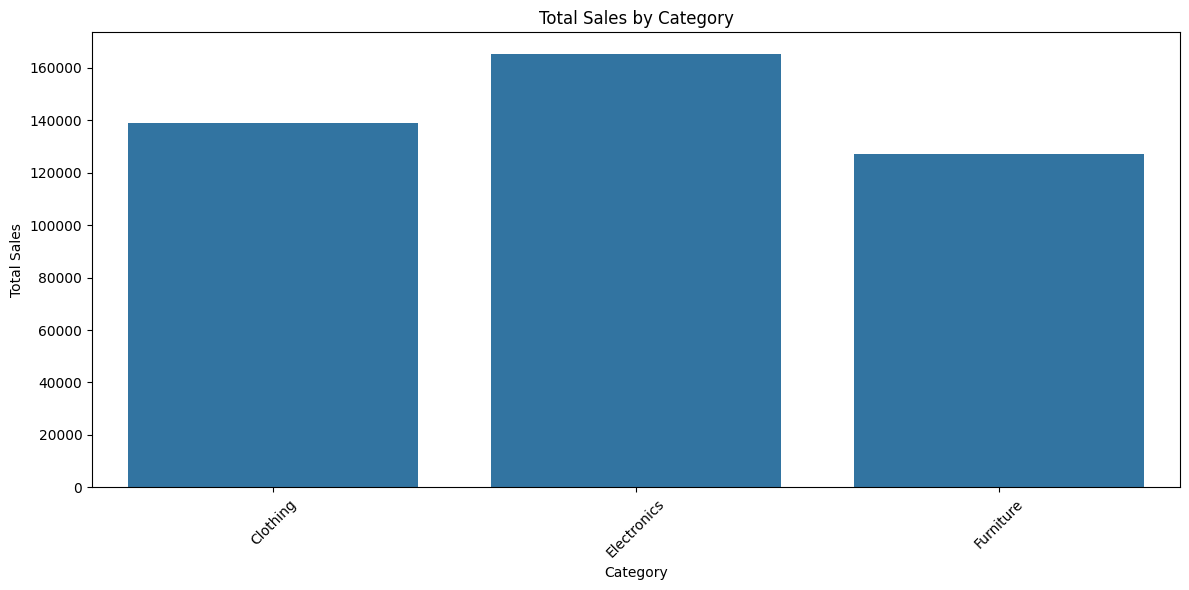

In [ ]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Total Sales', data=total_sales)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

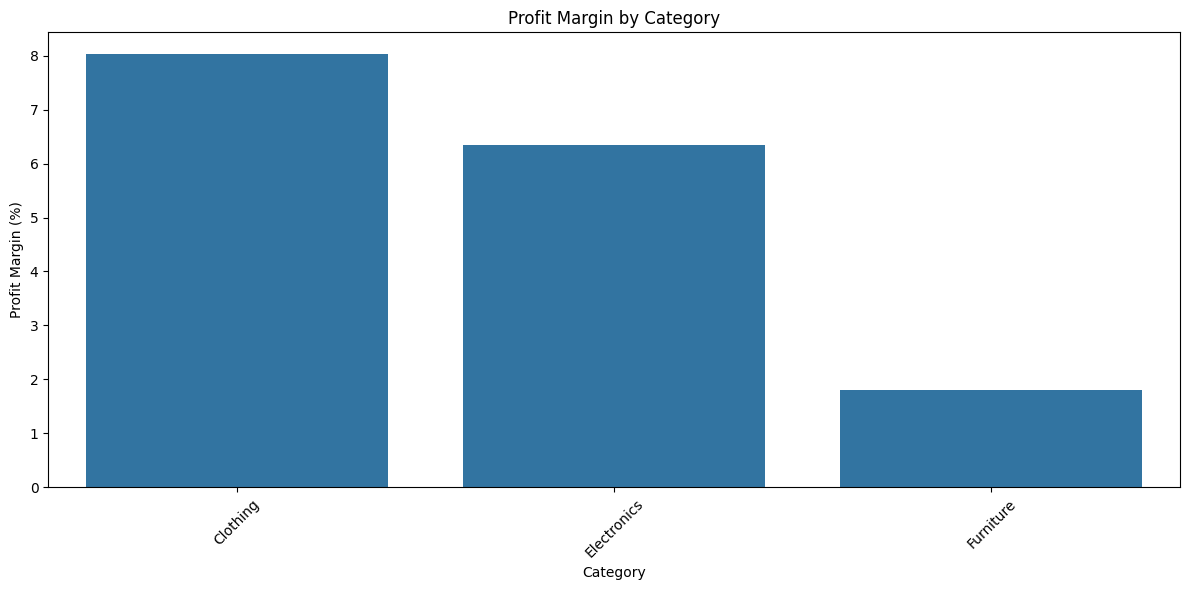

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit Margin (%)', data=profit_stats)
plt.title('Profit Margin by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


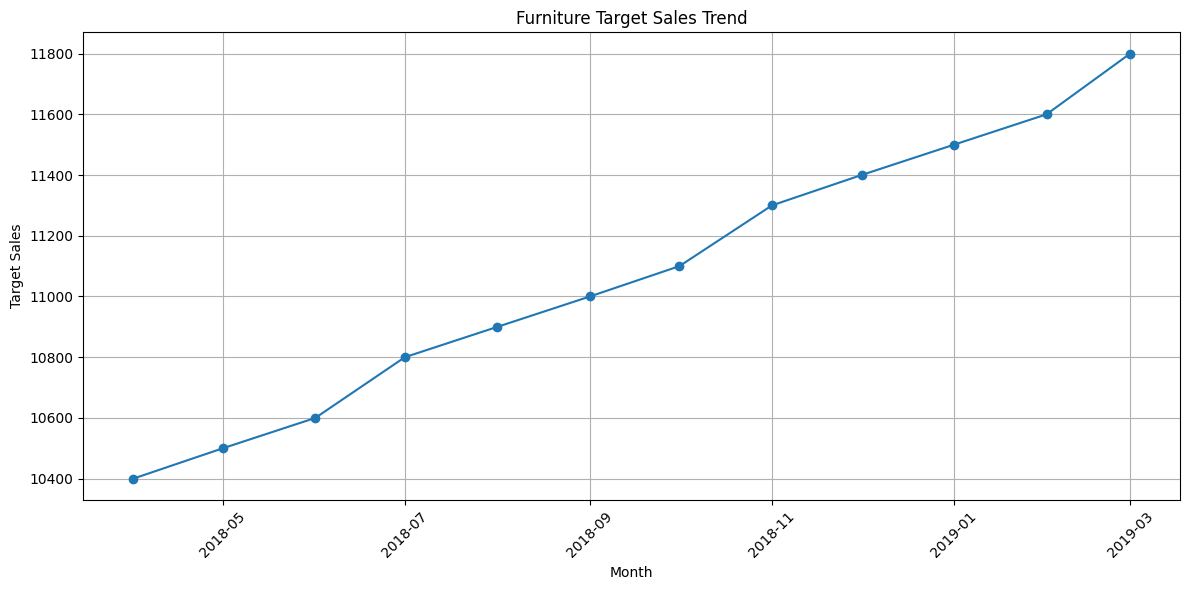

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(furniture_targets['Month of Order Date'], furniture_targets['Target'], marker='o')
plt.title('Furniture Target Sales Trend')
plt.xlabel('Month')
plt.ylabel('Target Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

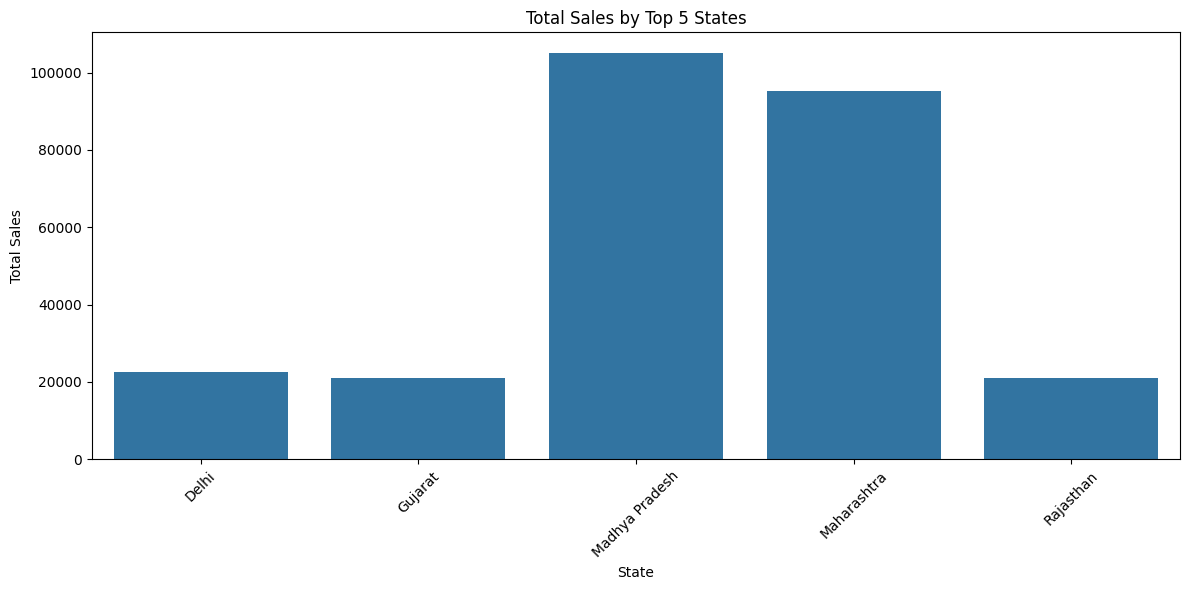

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Total Sales', data=regional_stats)
plt.title('Total Sales by Top 5 States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Print results
print("Part 1: Sales and Profitability Analysis")
print("\nTotal Sales by Category:")
print(total_sales)
print("\nProfit Statistics by Category:")
print(profit_stats)
print("\nTop-Performing Categories:")
print(top_performing)
print("\nUnderperforming Categories:")
print(underperforming)
print("\nSuggestions for Performance Differences:")
print("- Electronics: High sales and profit margins likely due to high-demand, high-value items (e.g., phones, printers). Focus on expanding product range.")
print("- Furniture: Lower margins may stem from high costs or discounts. Review pricing strategies or negotiate supplier costs.")
print("- Clothing: Moderate performance; consider promotions or bundling to boost sales.")
print("\nPart 2: Target Achievement Analysis")
print("\nFurniture Target Percentage Change:")
print(furniture_targets[['Month of Order Date', 'Target', 'Target Change (%)']])
print("\nSignificant Fluctuations (>10%):")
print(significant_fluctuations)
print("\nStrategies for Target Alignment:")
print("- Adjust targets based on historical sales trends to avoid unrealistic goals.")
print("- Increase marketing efforts in months with historically lower sales (e.g., early months).")
print("- Use predictive analytics to set dynamic targets.")

print("\nPart 3: Regional Performance Insights")
print("\nTop 5 States by Order Count:")
print(regional_stats)
print("\nUnderperforming States for Prioritization:")
print(underperforming_states)
print("\nRegions/Cities to Prioritize for Improvement:")
for state in underperforming_states['State']:
    print(f"- {state}: Focus on major cities with targeted marketing campaigns, optimized pricing, or local partnerships to boost profitability. Consider analyzing order details to identify low-margin products.")
# Include states with low overall activity (outside top 5) as untapped markets
low_activity_states = merged_data['State'].value_counts().tail(5).index
for state in low_activity_states:
    print(f"- {state}: Low order activity suggests an untapped market. Prioritize entry with promotional offers or regional distribution expansion.")

Part 1: Sales and Profitability Analysis

Total Sales by Category:
      Category  Total Sales
0     Clothing     139054.0
1  Electronics     165267.0
2    Furniture     127181.0

Profit Statistics by Category:
      Category  Avg Profit per Order  Total Profit  Total Sales  \
0     Clothing             11.762908       11163.0     139054.0   
1  Electronics             34.071429       10494.0     165267.0   
2    Furniture              9.456790        2298.0     127181.0   

   Profit Margin (%)  
0               8.03  
1               6.35  
2               1.81  

Top-Performing Categories:
      Category  Avg Profit per Order  Total Profit  Total Sales  \
1  Electronics             34.071429       10494.0     165267.0   
0     Clothing             11.762908       11163.0     139054.0   
2    Furniture              9.456790        2298.0     127181.0   

   Profit Margin (%)  
1               6.35  
0               8.03  
2               1.81  

Underperforming Categories:
      Cate